# InstaBot - II

Import required libraries

In [46]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


Open Instagram and Login to User

In [47]:
driver = webdriver.Chrome(ChromeDriverManager().install())

C:\Users\saura\AppData\Local\Temp\ipykernel_20980\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [48]:
driver.get('https://instagram.com')

In [49]:
insta_username = ''
insta_password = ''

In [50]:
wait = WebDriverWait(driver,5)
username=wait.until(EC.presence_of_element_located((By.NAME,'username')))
username.send_keys(insta_username)
time.sleep(2)
password = driver.find_element(By.NAME,'password')
password.send_keys(insta_password)
time.sleep(2)
password.submit()
time.sleep(5)
try:
    save_info_btn = wait.until(EC.presence_of_element_located((By.TAG_NAME,'button')))
    save_info_btn.click()
except:
    print("Button not found")
try:
    count=0
    while True:
        count+=1
        time.sleep(2)
        notifications_btns = wait.until(EC.presence_of_all_elements_located((By.TAG_NAME,'button')))
        if(notifications_btns[-1].text=='Not Now'):
            notifications_btns[-1].click()
            break
        if(count==5):
            break
except:
    print("Element not found")
    
print("User is logged in successfully")

User is logged in successfully


## Question 1

1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
    - From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
    - Now Find the number of posts these handles have done in the previous 3 days.
    - Depict this information using a suitable graph.

In [51]:
food_bloggers = [
'foodzeee',
'foodofgoa',
'pablo_thefoodcartel',
'foodie_incarnate',
'foo_dieonly',
'food_lunatic',
'food',
'food_and_foodies101',
'foodiesince96',
'foodie_in_delhi',
]

In [52]:
followers_list = []
posts_list = []
current_date = datetime.now().date()

for blogger in food_bloggers:
    driver.get('https://instagram.com/'+blogger)
    time.sleep(5)
    links = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_ac2a")))
    follwers = int(links[1].get_attribute('title').replace(',',''))
    followers_list.append(follwers)
    
    firstPost = driver.find_element(By.XPATH,'//article/div/div/div/div/a')
    firstPost.click()
    post_count=0
    
    while True:
        time.sleep(2)
        
        timestamp = driver.find_element(By.CLASS_NAME,'_aaqe')
        post_time = timestamp.get_attribute('datetime')
        post_date =  datetime.fromisoformat(post_time[:-1] + '+00:00').date()
        diff = current_date - post_date
        if(diff.days > 3 ):
            break
            
        post_count+=1
        next_btn = driver.find_element(By.CLASS_NAME,"_aaqg")
        next_btn.click()
    posts_list.append(post_count)

In [53]:
np_food_bloggers  = np.array(food_bloggers)
np_followers_list = np.array(followers_list)
np_posts_list = np.array(posts_list)

top_handles = []
for index in np.argsort(np_followers_list)[::-1][:5]:
    top_handles.append(np_food_bloggers[index])
    print(np_food_bloggers[index],np_followers_list[index])

foodie_incarnate 1474152
foodzeee 1354022
foodiesince96 319961
food 182702
food_lunatic 139224


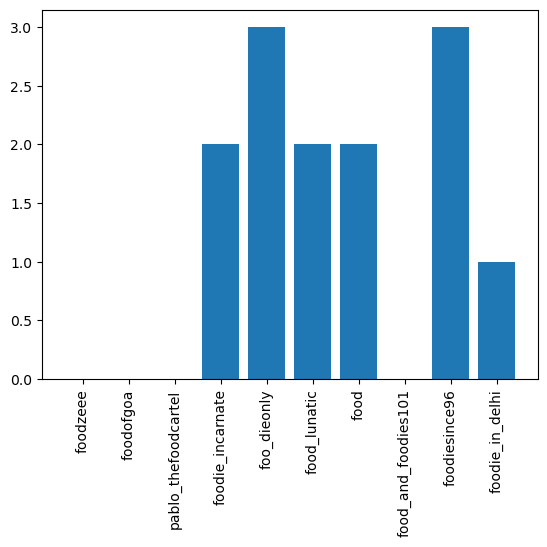

In [54]:
plt.bar(np_food_bloggers,np_posts_list)
plt.xticks(rotation = 90) 
plt.show()

# Question 2

2. Your friend also needs a list of hashtags that he should use in his posts.
    - Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
    - Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
    - Create a csv file with two columns : the word and its frequency
    - Now, find the hashtags that were most popular among these bloggers
    - Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [55]:
# driver.full_screen()

In [56]:
posts_list = []
hashtags_list = []
handles_likes = {}
for handle in top_handles:
    driver.get('https://instagram.com/'+handle)
    time.sleep(5)
    
    firstPost = driver.find_element(By.XPATH,'//article/div/div/div/div/a')
    firstPost.click()
    
    
    handles_likes[handle] = []
    for i in range(10):
        
        time.sleep(5)
        
        articlePost = driver.find_elements(By.XPATH,'//article')[1]
        articleHTML = BeautifulSoup(articlePost.get_attribute('outerHTML'),'lxml')
        
        caption_html = articleHTML.find(class_='_a9zs')
        caption_text = caption_html.text
        
        hashtags = [i.string for i in caption_html.find_all('a')]
        
        posts_list.append(caption_text)
        hashtags_list.append(hashtags)
        
        
        
        likes_html = articleHTML.find(class_='_ae5o')
        try : 
            likes = int(likes_html.text.split()[0].replace(',',''))
            handles_likes[handle].append(likes)
        except:
            print("Likes not available")
        
#         print(caption_text,hashtags,likes)
        
        next_btn = driver.find_element(By.CLASS_NAME,"_aaqg")
        next_btn.click()

Likes not available
Likes not available
Likes not available
Likes not available
Likes not available
Likes not available


In [57]:
words_frequency = {}
for post in posts_list:
    for word in post.split():
        if(str(word) in words_frequency):
            words_frequency[word]+=1
        else:
            words_frequency[word]=1


In [58]:
freq = []
for i in words_frequency:
    freq.append([i,words_frequency[i]])

In [59]:
df = pd.DataFrame(freq,columns=['word','frequency'])
df.to_csv('word_frequency.csv',index=False)

In [60]:
hash_freq = {}
for hs in hashtags_list:
    for h in hs:
        if h in hash_freq:
            hash_freq[h]+=1
        else:
            hash_freq[h]=1


In [61]:
hashs = list(hash_freq.keys())
hashCnt = list(hash_freq.values())
top_hashtags = []
top_hashtags_cnt = []
for i in np.argsort(hashCnt)[::-1][:5]:
    top_hashtags.append(hashs[i])
    top_hashtags_cnt.append(hashCnt[i])
    print(hashs[i],hashCnt[i])

#reels 13
#foodieincarnate 10
#reelitfeelit 10
#foodiesince96 10
#recipe 9


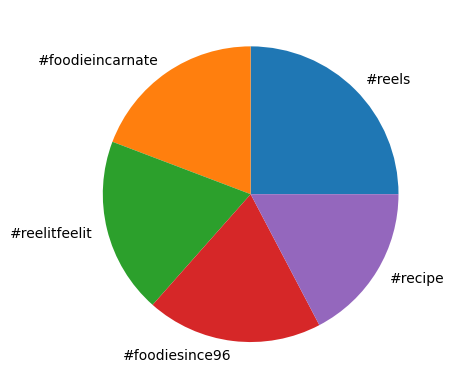

In [62]:
plt.pie(top_hashtags_cnt,labels=top_hashtags)
plt.show()

# Question 3

3. You need to also calculate average followers : likes ratio for the obtained handles.
   Followers : Likes ratio is calculated as follows:
    - Find out the likes of the top 10 posts of the 5 handles obtained earlier.
    - Calculate the average likes for a handle.
    - Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
    - Create a bar graph to depict the above obtained information.

In [63]:
followers_dic={}
for i in range(10):
    followers_dic[food_bloggers[i]]=followers_list[i]

In [64]:
avgLikes={}
for i in handles_likes:
    if  len(handles_likes[i])==0:
        avgLikes[i]=0
    else :
        avgLikes[i]=sum(handles_likes[i]) / len(handles_likes[i])

In [65]:
ratioLikes={}
for i in avgLikes:
    ratioLikes[i]=avgLikes[i]/followers_dic[i]

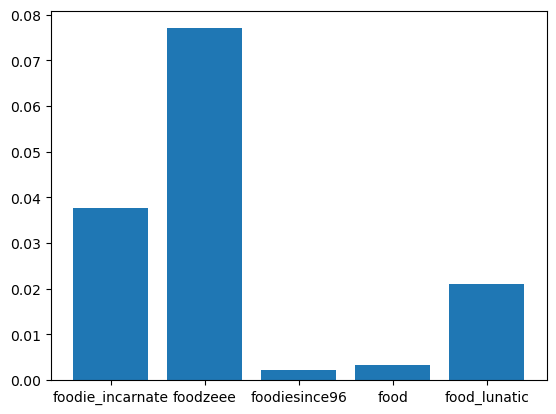

In [66]:
xValues = list(ratioLikes.keys())
yValues = list(ratioLikes.values())

plt.bar(xValues,yValues)
plt.show()